In [1]:
print('hi')

hi


# 1.2 Take a Quick Look at Data Structure

In [5]:
import pandas as pd
def load_data(csv_path):
    return pd.read_csv(csv_path)

In [6]:
csv_path = r"C:\Users\KI PC\OneDrive\Documents\GitHub\Bigmart-Sales-Data\train_v9rqX0R.csv"
sales_data = load_data(csv_path)

In [7]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
sales_data.shape

(8523, 12)

There are quite a few categorical variable. Let's take a quick look at them

In [14]:
sales_data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
sales_data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Based on the data description, it seems that "Low Fat", "LF", and "LF" should be categorized as one category

Similarly, "Regular" and "reg" should be categorizes as one category

In [15]:
sales_data["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [23]:
sales_data.loc[sales_data["Outlet_Identifier"] == "OUT010", "Outlet_Size"].value_counts()

Series([], Name: Outlet_Size, dtype: int64)

So, it looks like for some specific outlet, the data "Outlet_Size" is completely missing. Maybe we can take a look at outlet type for clues into "Outlet_Size"

In [26]:
sales_data["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [27]:
sales_data.loc[sales_data["Outlet_Identifier"] == "OUT010", "Outlet_Type"].value_counts()

Grocery Store    555
Name: Outlet_Type, dtype: int64

So all of "OUT010" which is missing data has outlet_type of Grocery Store

In [28]:
sales_data.loc[sales_data["Outlet_Type"] == "Grocery Store", "Outlet_Size"].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

So it seems that all stores with Outlet_Type == "Groccery Store" has "Outlet_Size" of small. Let's see if similar thing holds with all the Outlet_Type. If it does then we can use it to fill up missing Outlet_Size data

In [47]:
test_groupby = sales_data.groupby(['Outlet_Type', 'Outlet_Size'])

In [48]:
#Exactly what I need
test_groupby.size()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64

In [49]:
#Not giving me what I want
sales_data.pivot_table(index = ['Outlet_Type'], values = 'Outlet_Size', aggfunc =  'count') 

,Outlet_Size
Outlet_Type,
Grocery Store,528
Supermarket Type1,3722
Supermarket Type2,928
Supermarket Type3,935


In [39]:
#Not giving me what I want; same result as before
sales_data.groupby('Outlet_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
Outlet_Type,,,,,,,,,,,
Grocery Store,1083,555,1083,1083,1083,1083,1083,1083,528,1083,1083
Supermarket Type1,5577,5577,5577,5577,5577,5577,5577,5577,3722,5577,5577
Supermarket Type2,928,928,928,928,928,928,928,928,928,928,928
Supermarket Type3,935,0,935,935,935,935,935,935,935,935,935


Now let's see the outlet_type for the rows which are missing data for Outlet_size. If they are Supermarket Type1, then we can easily impute them confidently

In [53]:
sales_data.loc[sales_data["Outlet_Size"].isnull(), 'Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [54]:
#So for 555 of those vlaues, we can impute confidently. For the others, we can use a function like below to impute

In [57]:
#This function generates 'x' with probability px/100, 'y' with 
#probability py/100  and 'z' with probability pz/100:
#Assumption: px + py + pz = 100 where px, py and pz lie 
#between 0 to 100 
#https://www.geeksforgeeks.org/write-a-function-to-generate-3-numbers-according-to-given-probabilities/
from random import randint
def random_number_generator(x, y, z, px, py, pz):
    
    #generate a number from 1 to 100
    r = randint(1,100)

    #r is smaller than px with probability px/100
    if (r <= px):
        return x
    
    #r is greater than px and smaller than or equal to px+py 
    if (r <= (px + py)):
        return y
    
    #r is greater than px+py and smaller than or equal to 100 
    else:
        return z



We can use grid search to find best strategy between this vs. most_frequent later on

In [ ]:
#Next 

In [ ]:
sales_data["Item_Weight"]

In [59]:
sales_data["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [60]:
#Let's see if we can use any other column to find link to Outlet_size

In [61]:
test_groupby2 = sales_data.groupby(['Outlet_Establishment_Year', 'Outlet_Size'])

In [62]:
test_groupby2.size()

Outlet_Establishment_Year  Outlet_Size
1985                       Medium         935
                           Small          528
1987                       High           932
1997                       Small          930
1999                       Medium         930
2004                       Small          930
2009                       Medium         928
dtype: int64

In [63]:
sales_data.loc[sales_data["Outlet_Size"].isnull(), 'Outlet_Establishment_Year'].value_counts()

2002    929
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64

We are seeing years that is not part of test_groupby2. So we need to dig a bit more

In [65]:
sales_data_outlet_size_null = sales_data.loc[sales_data["Outlet_Size"].isnull(), :]

In [69]:
test_df4 = sales_data_outlet_size_null.groupby(['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Type'])
test_df4.size()

Series([], dtype: int64)

In [70]:
test_df5 = sales_data_outlet_size_null.groupby(['Outlet_Establishment_Year', 'Outlet_Type'])
test_df5.size()

Outlet_Establishment_Year  Outlet_Type      
1998                       Grocery Store        555
2002                       Supermarket Type1    929
2007                       Supermarket Type1    926
dtype: int64

So we got nowhere. We knew from bfore that the 555 missing values in Outlet_Size can be imputed by looking at its Outlet_Type which is Grocery Store and then look at the Outlet_Size of Grocery Store which are all the same

The years we have don't have valid values for Outlet_Size anywhere. So we can't impute from that too

Let's do a last check with Outlet_Location_Type and see if we can use that to impute Outlet_Size

In [71]:
sales_data["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [72]:
sales_data_outlet_size_null['Outlet_Location_Type'].value_counts()

Tier 2    1855
Tier 3     555
Name: Outlet_Location_Type, dtype: int64

In [81]:
sales_data_outlet_size_null.groupby(['Outlet_Location_Type', 'Outlet_Type']).size()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    1855
Tier 3                Grocery Store         555
dtype: int64

All tier 3 location type is grocery store. We already know how to impute them based on grocery store so we don't gain value from this

Tier 2 is always supermarket type1 and we can't impute based of that

In [79]:
sales_data.groupby(['Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size']).size()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
dtype: int64

In [87]:
sales_data.loc[sales_data['Outlet_Location_Type'] == 'Tier 2', :].shape

(2785, 12)

In [88]:
1855 + 930 

2785

So Tier 2 appears 2785 times in this whole dataset. 930 times, outlet_size is given and 1855 times, the outlet_size is not given. Since whenever Tier 2 appears in the list, outlet_size is small, when we have missing data for Outlet_Size and we have Tier 2 for those missing data, we can just fill it in as small

And that's it. We have successfully figured out how to fully fill Outlet_Size

For Tier 2 outlet, outlet_size is always small when data do exists. 

In [89]:
sales_data_outlet_size_nonNull = sales_data.loc[sales_data["Outlet_Size"].notnull(), :]

In [90]:
sales_data_outlet_size_nonNull["Outlet_Location_Type"].value_counts()

Tier 3    2795
Tier 1    2388
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

And that's it. We have successfully figured out how to fully fill Outlet_Size

I should figure out the logic behind what I just did and automate that. So, I can improve on that and use this idea more often

Okay. Now, let's take a look at Item_Weight. It has missing values too (about 1500)

In [92]:
sales_data["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

It's numeric content. Maybe I can use imputer strategy and based on its category (see if weight distribution changes much at all based on category) use the mean of that distribution

Multiple Kernel Density plot would be sweet to use here

In [94]:
sales_data["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [95]:
#Let's use multiple violon plot instead

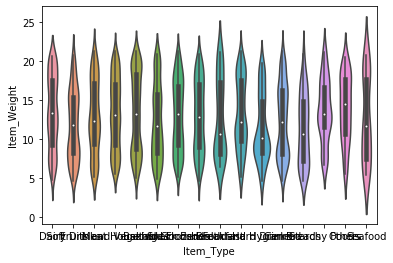

In [101]:
import seaborn as sb
import matplotlib.pyplot as plt
ax = sb.violinplot(data = sales_data, x = 'Item_Type', y = 'Item_Weight', )

In [102]:
ax.xticks(rotation=90)

AttributeError: 'AxesSubplot' object has no attribute 'xticks'